### Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary classification
* Mutliclass classification
* Multilabel classification


### Creating data to view and fit

In [16]:
from sklearn.datasets import make_circles

# Make 2000 examples
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [17]:
# Check out features
X

array([[ 0.47109875, -0.58158579],
       [-0.61696058,  0.80818956],
       [-0.3999557 ,  0.70796779],
       ...,
       [ 0.62826832, -0.73910589],
       [-0.78365851,  0.16358464],
       [ 0.58442953,  0.56308224]])

In [18]:
# Check the labels
y[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [19]:
X[:,0], X[:, 1]

(array([ 0.47109875, -0.61696058, -0.3999557 , ...,  0.62826832,
        -0.78365851,  0.58442953]),
 array([-0.58158579,  0.80818956,  0.70796779, ..., -0.73910589,
         0.16358464,  0.56308224]))

In [20]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
...,...,...,...
1995,0.568918,0.583759,1
1996,-0.222517,0.756905,1
1997,0.628268,-0.739106,0
1998,-0.783659,0.163585,1


In [21]:
circles["label"].value_counts()

1    1000
0    1000
Name: label, dtype: int64

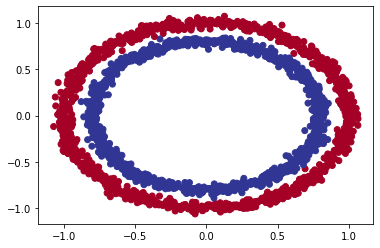

In [22]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
     

In [23]:

# Check the shapes of our features and labels
X.shape, y.shape
     

((2000, 2), (2000,))

In [24]:
# How many samples we're working
len(X), len(y)
     

(2000, 2000)

In [25]:
# View the first example of features and labels
X[0], y[0]

(array([ 0.47109875, -0.58158579]), 1)

### Steps in modelling
The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [26]:
# Import TensorFlow
import tensorflow as tf
tf.__version__
     

'2.6.0'

In [27]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
63/63 [==============================] - 1s 2ms/step - loss: 1.5871 - accuracy: 0.4770
Epoch 2/5
63/63 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4970
Epoch 3/5
63/63 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4950
Epoch 4/5
63/63 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4845
Epoch 5/5
63/63 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4930


In [28]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

63/63 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4300


[0.6931992173194885, 0.4300000071525574]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [29]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
    # add an extra Dense layer to see what happens
  tf.keras.layers.Dense(1)                                                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [30]:
# 4. Evaluate the model
model_2.evaluate(X, y)

63/63 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936753392219543, 0.5]

We now have a slighly better accuracy but still performing as if it's guessing tail/head 50/50

So how can we improve our model?

### Improving our model
Let's look into our bag of tricks to see how we can improve our model.

- Create a model - we might to add more layers or increase the number of hidden units within a layer.
- Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
- Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [31]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), #BinaryCrossentropy because we have binary classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [32]:
# 4. Evaluate the model
model_3.evaluate(X, y)
     

63/63 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5730


[0.696308434009552, 0.5730000138282776]

A slighty improved again, but still not good enough. If we don't know why the model is performing badly or there is something going on the data you need to remember: `visualize, visualize and visualize`

To visulize our model's predictions, let's create a function plot_decision_boundary(), this function will:

1. Take in a trained model, features (X) and labels (y)
2. Create a meshgrid of the different X values
3. Make predictions across the meshgrid
4. Plot the predictions as well as a line between zones (where each unique class falls)

In [33]:
import numpy as np

In [34]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


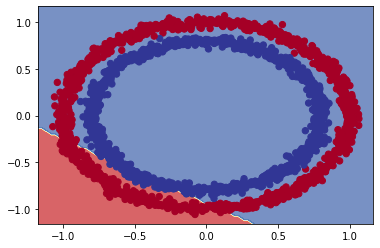

In [35]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [36]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


This is because we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [42]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae, #This is regression-specific loss function we first had BinaryCrossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_reg_train, y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 248.2148 - mae: 248.2148
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.8992 - mae: 138.8992
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1035 - mae: 53.1035
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 73.5183 - mae: 73.5183
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2370 - mae: 71.2370
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0045 - mae: 47.0045
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9374 - mae: 45.9374
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3635 - mae: 42.3635
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6835 - mae: 43.6835
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6201 - mae: 42.6201
Epoch 11/100
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 3ms/step - loss: 38.8397 - mae: 38.8397
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 38.6604 - mae: 38.6604
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 38.7558 - mae: 38.7558
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5443 - mae: 38.5443
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3247 - mae: 38.3247
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 38.8431 - mae: 38.8431
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 39.1135 - mae: 39.1135
Epoch 94/100
5/5 [==============================] - 0s 3ms/step - loss: 38.1464 - mae: 38.1464
Epoch 95/100
5/5 [==============================] - 0s 3ms/step - loss: 38.3999 - mae: 38.3999
Epoch 96/100
5/5 [==============================] - 0s 3ms/step - loss: 38.5598 - mae: 38.5598
Epoch 97/100
5/5 [==============================] - 0s 3ms/step

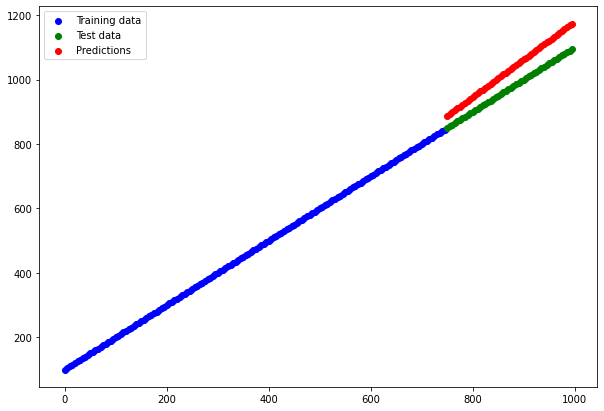

In [43]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [44]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                               
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

C:\Users\A\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
63/63 [==============================] - 0s 2ms/step - loss: 4.2165 - accuracy: 0.4570
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 4.1098 - accuracy: 0.4330
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 4.0515 - accuracy: 0.4260
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 4.0036 - accuracy: 0.4225
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 3.9462 - accuracy: 0.4150
Epoch 6/100
63/63 [==============================] - 0s 4ms/step - loss: 3.8742 - accuracy: 0.4130
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 3.7890 - accuracy: 0.4205
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 3.7004 - accuracy: 0.4235
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 3.5886 - accuracy: 0.4305
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 3.5178 - accuracy: 0.4190
Epoch 11/

63/63 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.5000
Epoch 84/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7153 - accuracy: 0.5000
Epoch 85/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7138 - accuracy: 0.5000
Epoch 86/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.5000
Epoch 87/100
63/63 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.5000
Epoch 88/100
63/63 [==============================] - 0s 3ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.5000
Epoch 90/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 91/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5000
Epoch 92/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 93/100


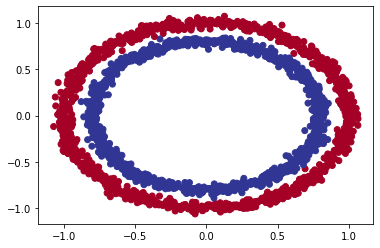

In [45]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

doing binary classification


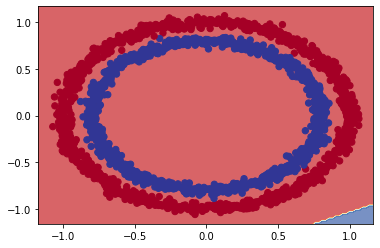

In [46]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [47]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)  #Now we have added a non-reality to our model                     
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 4.2165 - accuracy: 0.4570
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 4.1098 - accuracy: 0.4330
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 4.0515 - accuracy: 0.4260
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 4.0036 - accuracy: 0.4225
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 3.9462 - accuracy: 0.4150
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 3.8742 - accuracy: 0.4130
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 3.7890 - accuracy: 0.4205
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 3.7004 - accuracy: 0.4235
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 3.5886 - accuracy: 0.4305
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 3.5178 - accuracy: 0.4190
Epoch 11/

63/63 [==============================] - 0s 3ms/step - loss: 0.7168 - accuracy: 0.5000
Epoch 84/100
63/63 [==============================] - 0s 4ms/step - loss: 0.7153 - accuracy: 0.5000
Epoch 85/100
63/63 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.5000
Epoch 86/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.5000
Epoch 87/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7111 - accuracy: 0.5000
Epoch 88/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.5000
Epoch 90/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.5000
Epoch 91/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.5000
Epoch 92/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5000
Epoch 93/100


In [48]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(1)                           
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
63/63 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
63/63 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 84/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 85/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 86/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 87/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 88/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 89/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 90/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 91/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 92/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 93/250


63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 165/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 166/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 167/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 168/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 169/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 170/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 171/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 172/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 173/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoc

63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 246/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 247/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 248/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 249/250
63/63 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 250/250
63/63 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [49]:
# Evalaute the model
model_6.evaluate(X, y)

63/63 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712475299835205, 0.5]

doing binary classification


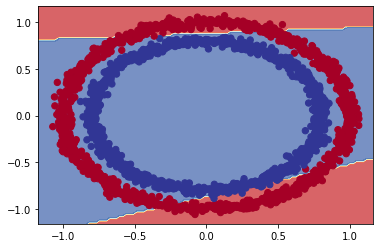

In [50]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [54]:
# set random seed
tf.random.set_seed(42)

#1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#2. Compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

#3. Fit the model
history = model_7.fit(X,y, epochs = 50)

Epoch 1/50
63/63 [==============================] - 1s 3ms/step - loss: 0.6868 - accuracy: 0.5130
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5270
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5385
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5430
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5420
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.5395
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5490
Epoch 8/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5480
Epoch 9/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5510
Epoch 10/50
63/63 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.5530
Epoch 11/50
63/63 [

In [56]:
#4 . Evaluate our model
model_7.evaluate(X,y)

63/63 [==============================] - 0s 2ms/step - loss: 0.2426 - accuracy: 0.9910


[0.2426425665616989, 0.9909999966621399]

doing binary classification


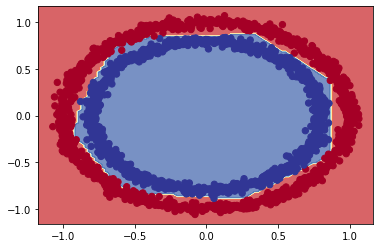

In [57]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7,X,y)

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.



In [58]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10),dtype=tf.float32)

In [59]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

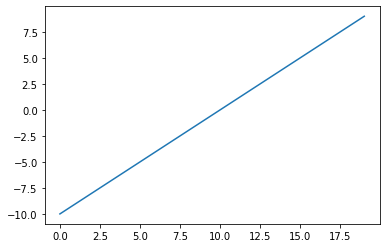

In [61]:
# Visualize our toy tensor
plt.plot(A)

In [64]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    x = 1 / (1 + tf.exp(-x))
    return x

In [65]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

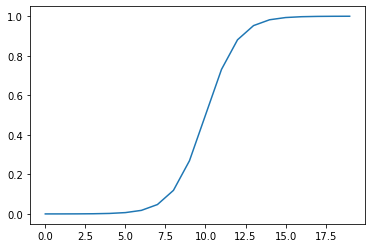

In [69]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [70]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0,x)


In [71]:
# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

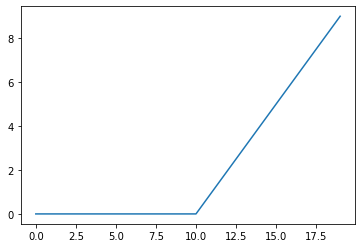

In [72]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [73]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

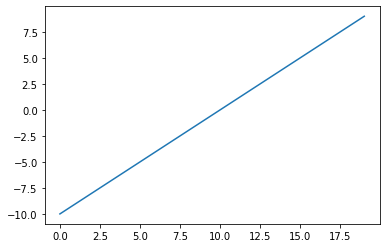

In [74]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [75]:
# Does A even change?
A == tf.keras.activations.linear(A)
     

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classificiation model

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [76]:
# Check how many examples we have
len(X)

2000

In [77]:
# Split into train and test sets
X_train, y_train = X[:1600], y[:1600]
X_test, y_test = X[1600:], y[1600:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 2), (400, 2), (1600,), (400,))

In [79]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5456
Epoch 2/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5700
Epoch 3/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6256
Epoch 4/25
50/50 [==============================] - 0s 3ms/step - loss: 0.6093 - accuracy: 0.7387
Epoch 5/25
50/50 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.8094
Epoch 6/25
50/50 [==============================] - 0s 3ms/step - loss: 0.4410 - accuracy: 0.8681
Epoch 7/25
50/50 [==============================] - 0s 3ms/step - loss: 0.3241 - accuracy: 0.9463
Epoch 8/25
50/50 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9700
Epoch 9/25
50/50 [==============================] - 0s 3ms/step - loss: 0.1763 - accuracy: 0.9819
Epoch 10/25
50/50 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.9781
Epoch 11/25
50/50 [

In [80]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9850


[0.04545345902442932, 0.9850000143051147]

doing binary classification
doing binary classification


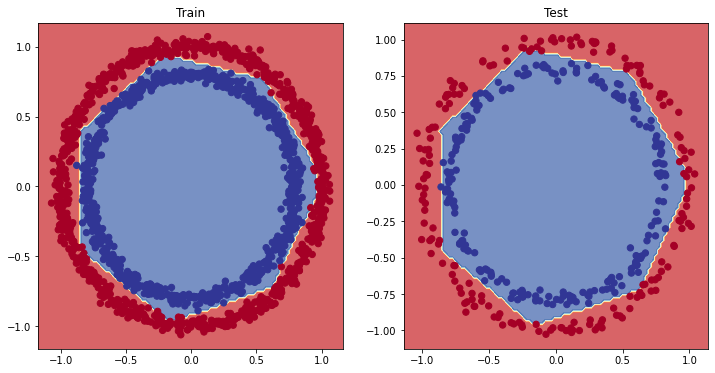

In [89]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

     

In [91]:
model_7.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.676168,0.545625
1,0.664961,0.570000
2,0.647800,0.625625
3,0.609337,0.738750
4,0.535206,0.809375
5,0.441010,0.868125
6,0.324062,0.946250
7,0.234844,0.970000
8,0.176276,0.981875
9,0.143323,0.978125


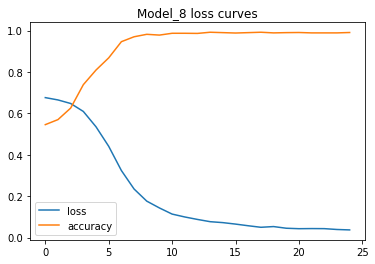

In [93]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

### Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

- A learning rate callback - you can think of a callback as an extra piece of funtionality, you can add to your while its training.
- Another model (we could use the same one as above, but we're practicing building models here)
- A modified loss curves plot.

In [95]:
tf.random.set_seed(42)

#1. Create a model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2a. Compile the model
model_9.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics='accuracy')

#2b. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#3. Fit the model with 2b
history_9 = model_9.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler])


Epoch 1/100
50/50 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.5119
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5113
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5194
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5213
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6843 - accuracy: 0.5138
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5156
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5200
Epoch 8/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5294
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5337
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5275
Epoch 11/

50/50 [==============================] - 0s 3ms/step - loss: 0.7134 - accuracy: 0.5000
Epoch 84/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.5100
Epoch 85/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.5025
Epoch 86/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.4925
Epoch 87/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7228 - accuracy: 0.4963
Epoch 88/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.4975
Epoch 89/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.5025
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7332 - accuracy: 0.5050
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - loss: 0.7430 - accuracy: 0.5125
Epoch 92/100
50/50 [==============================] - 0s 2ms/step - loss: 0.7594 - accuracy: 0.5100
Epoch 93/100


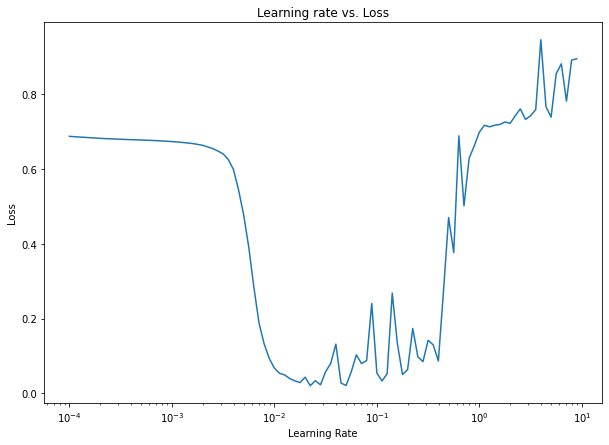

In [96]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20)) #tf.range = epochs = 100
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [97]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [98]:
# Learning rate we used before (model_8)
10**-2

0.01

In [99]:
# Let's try using a higher *ideal* learning rate with the same model as before

#1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#2. Compile the model
model_10.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')

#3. Fit the model
history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.4994
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6691 - accuracy: 0.5713
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.6644
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7569
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 0.4474 - accuracy: 0.8737
Epoch 6/20
50/50 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.9456
Epoch 7/20
50/50 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9831
Epoch 8/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1744 - accuracy: 0.9875
Epoch 9/20
50/50 [==============================] - 0s 4ms/step - loss: 0.1345 - accuracy: 0.9869
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9925
Epoch 11/20
50/50 [

In [101]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9950


[0.03363041579723358, 0.9950000047683716]

In [102]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9850


[0.04545345902442932, 0.9850000143051147]

doing binary classification
doing binary classification


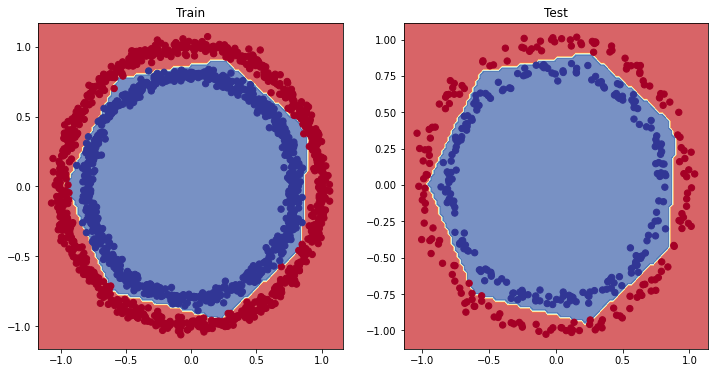

In [103]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [105]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

13/13 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9950
Model loss on the test set: 0.03363041579723358
Model accuracy on the test set: 99.50%


In [106]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [108]:
y_test, y_preds

(array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 

In [110]:
y_preds.flatten()

array([2.33795401e-02, 5.07674873e-01, 9.92858171e-01, 4.59352508e-02,
       1.99990254e-02, 9.92667973e-01, 3.37106059e-04, 9.49679792e-01,
       9.93288577e-01, 7.06755230e-03, 1.54374482e-03, 1.80208925e-02,
       9.94614899e-01, 8.28876138e-01, 6.65104836e-02, 9.83430624e-01,
       9.99035239e-01, 2.03861156e-04, 9.94768143e-01, 1.49807390e-02,
       9.92042840e-01, 9.95591164e-01, 9.98782098e-01, 9.71019804e-01,
       9.87119913e-01, 9.97222900e-01, 9.65667307e-01, 9.88222539e-01,
       1.32616395e-02, 9.72376645e-01, 4.31285252e-06, 4.81564769e-07,
       9.99286354e-01, 1.19454656e-02, 9.80765402e-01, 4.00679484e-02,
       1.78149551e-01, 1.11336851e-06, 9.50192809e-01, 9.98272419e-01,
       2.30485592e-02, 9.98143196e-01, 9.20103133e-01, 8.73932242e-01,
       1.90607752e-05, 9.82782841e-01, 9.76597488e-01, 3.33142444e-03,
       9.98925030e-01, 9.46060002e-01, 4.05164100e-02, 1.50924316e-05,
       7.29788007e-05, 9.99130309e-01, 3.15172685e-04, 9.98888671e-01,
      

In [123]:
# Create confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))

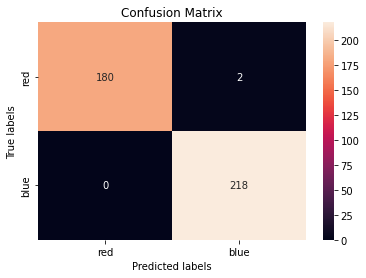

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['red', 'blue']); ax.yaxis.set_ticklabels(['red', 'blue']);